# Airline Ticket Price Prediction
### A step by step guide for predicting the Flight Ticket Price
Pricing in the airline industry is often compared to a brain game between carriers and passengers where each party pursues the best rates. Carriers love selling tickets at the highest price possible — while still not losing consumers to competitors. Passengers are crazy about buying flights at the lowest cost available — while not missing the chance to get on board. All this makes flight prices fluctuant and hard to predict. But nothing is impossible for people armed with intellect and algorithms.

Today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. So I tried to build Airfare Price Prediction Model from data set. 

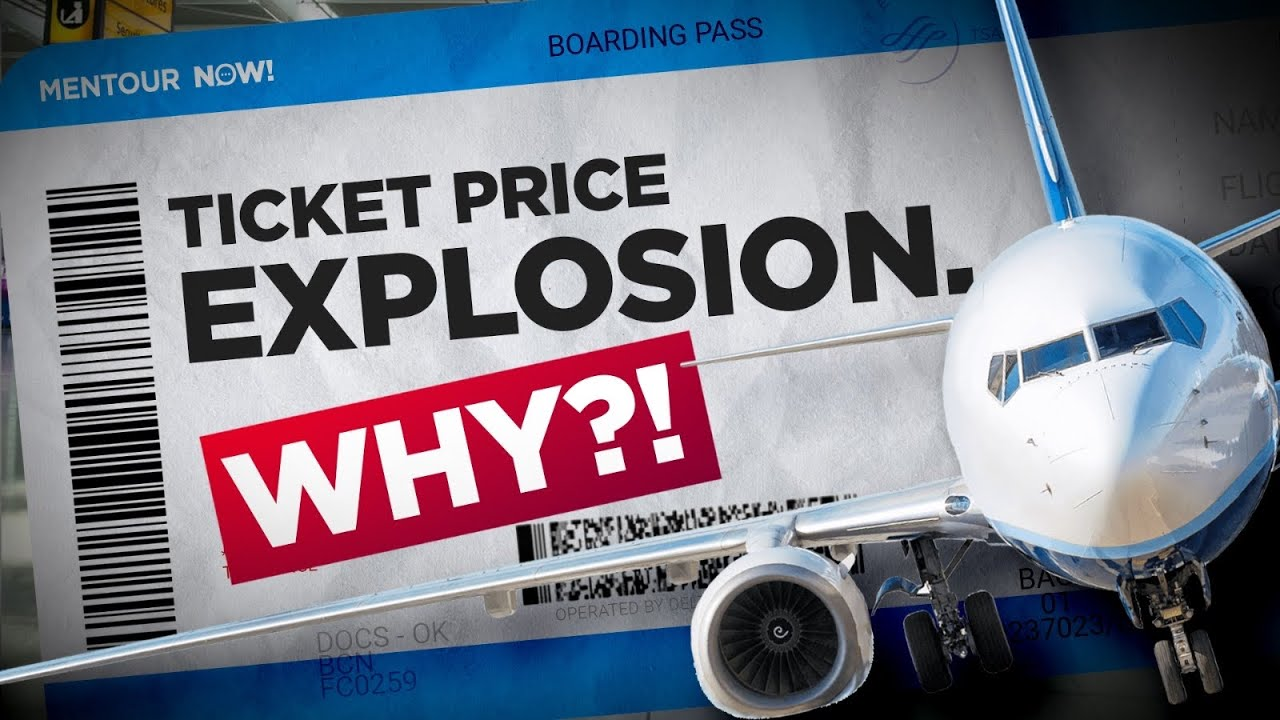

### Features of Dataset: 
* Airline: The name of the airline. 
* Date_of_Journey: The date of the journey 
* Source: The source from which the service begins. 
* Destination: The destination where the service ends. 
* Route: The route was taken by the flight to reach the destination. 
* Dep_Time: The time when the journey starts from the source. 
* Arrival_Time: Time of arrival at the destination. 
* Duration: Total duration of the flight. 
* Total_Stops: Total stops between the source and destination. 
* Additional_Info: Additional information about the flight. 
* Price: The price of the ticket

### Table of Contents
1. Data Pre-processing
2. Exploratory data analysis (EDA)
3. Outlier Detection
4. Feature Selection
5. Building Machine Learning Models

### Objectives
The main objectives of creating a Flight Price Prediction Machine Learning Model include the following:

* Price forecasting: The model can predict the future prices of flights, which can help airlines and travel agencies to adjust their prices accordingly and remain competitive.
* Inventory management: The model can be used to predict flight demand, which can help airlines and travel agencies optimize their inventory and avoid overbooking or underbooking.
* Revenue optimization: The model can maximize revenue by predicting the prices at which flights will sell the most, which can help airlines and travel agencies adjust their prices accordingly.
* Personalized pricing: The model can be used to personalize pricing for different customers by considering factors such as their past purchase history, location, and demographics.
* Anomaly Detection: The model can detect abnormal prices, which can help airlines and travel agencies identify pricing errors or fraud.

Overall, the goal of creating a flight price prediction model is to improve pricing decisions, optimize inventory and revenue, and improve customer experience.

# Step 1: Data Pre-processing
Data preprocessing, a component of data preparation, describes any type of processing performed on raw data to prepare it for another data processing procedure. It has traditionally been an important preliminary step for the data mining process.

In [1]:
# import the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

# ignorn warning 
import warnings
warnings.filterwarnings('ignore')

# code to show the figure 
%matplotlib inline

In [2]:
# import dataset 
train_data=pd.read_excel('Train_Tickets_Data.xlsx')
test_data=pd.read_excel('Test_Tickets_Data.xlsx')

In [3]:
# data for heatmap
copy = train_data

In [4]:
# view top 5 line of the train dataset (defult value)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# get a concise summary of the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

As we saw above our Destination had Delhi and New Delhi so we merged both of them.

In [7]:
# create afunction to merge the destination of Delhi and New Delhi
def Delhi(x):
    if x == 'New Delhi':
        return 'Delhi'
    else:
        return x
    
train_data['Destination'] = train_data['Destination'].apply(Delhi)

In [8]:
# Checking values in the Destination column
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [9]:
# check the null value for each column 
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
### getting all the rows with null value
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
# drop the row with null value
train_data.dropna(inplace=True)

In [12]:
# check the null value for each column 
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


As we saw above some features of our dataset are not in a presentable format for model training, we nned to change theri format.

In [14]:
# extract the journey day, journey month, journey year from the Date of the journey and make 3 columns for them
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
train_data['Journey_year'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.year

# drop the Date of the journey column
train_data.drop('Date_of_Journey',inplace=True,axis=1)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [15]:
# extract departure hour and departure minutes from departure time.
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

# drop the departure time column
train_data.drop('Dep_Time',axis=1,inplace=True)

In [16]:
# extract arrival hour and minutes from arrival time.
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# drop the arrival time column
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [17]:
# view dataset
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [18]:
# checking values in the Duration column
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

Create a function to extarct useful information from duration column

In [19]:
# creating a list of all the durations present in the data
duration = list(train_data['Duration'])

# We are just bringing every duration to the same format. There might 
# be a case when some flight duration will be just 30m so we will write 
# it as ‘0h 30m’ and there may also be cases like 2h so we will write it as ‘2h 0m’
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
# split it into 2 components, hour and minute
duration_hour = []
duration_min = []
for i in duration:
    h,m = i.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))

# two columns ‘Duration_hours’ and ‘Duration_mins’
train_data['Duration_hours'] = duration_hour
train_data['Duration_mins'] = duration_min

# Drop the original Duration column
train_data.drop('Duration',axis=1,inplace=True)


In [20]:
# checking values in the Total stops column
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [21]:
# converte labels into numbers in the Total_stops column
# acc to the data, price is directly prop to the no. of stops
train_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [22]:
# drop useless columns 
train_data.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [23]:
# view data
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,0,12648,1,3,2019,11,30,14,10,2,40


# Step 2: Exploratory Data Analysis (EDA)
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

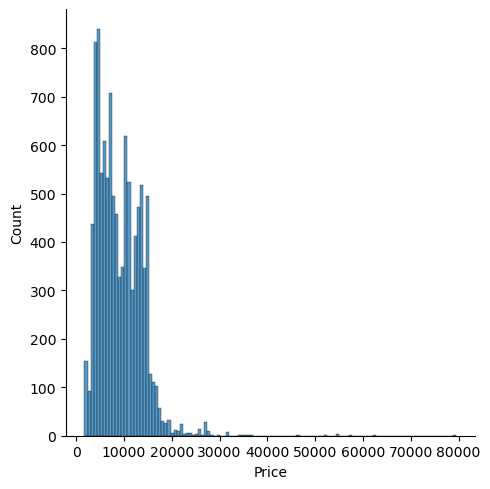

In [24]:
# price normal distribution plot
sns.displot(x= 'Price', data=train_data)
plt.show()

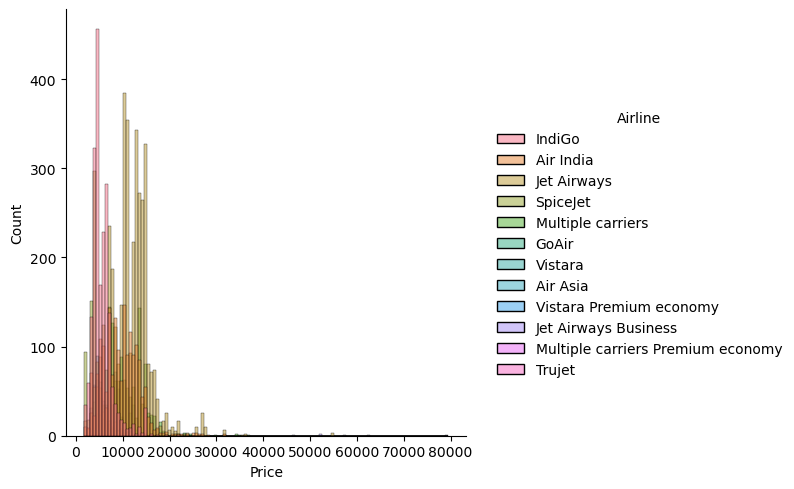

In [25]:
# price normal distribution plot
sns.displot(x= 'Price', data=train_data, hue='Airline')
plt.show()

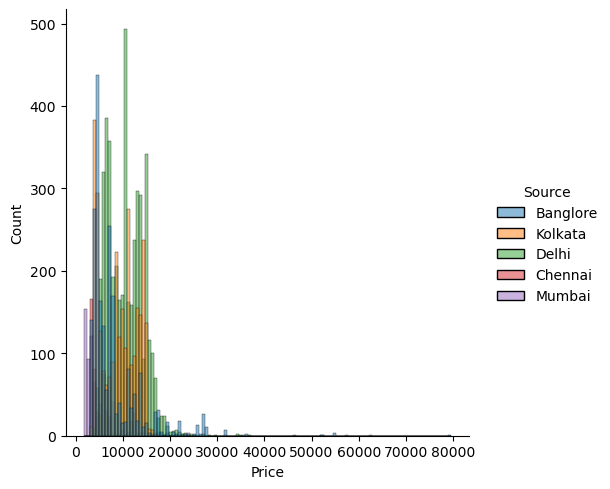

In [26]:
# price normal distribution plot
sns.displot(x= 'Price', data=train_data, hue='Source')
plt.show()

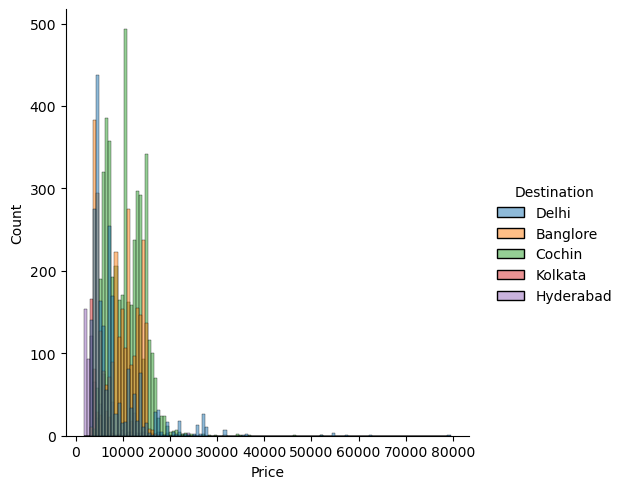

In [27]:
# price normal distribution plot
sns.displot(x= 'Price', data=train_data, hue='Destination')
plt.show()

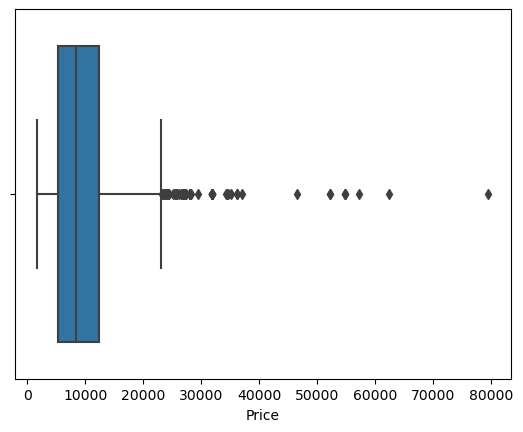

In [28]:
# price distribution boxplot
sns.boxplot(x= 'Price', data=train_data)
plt.show()

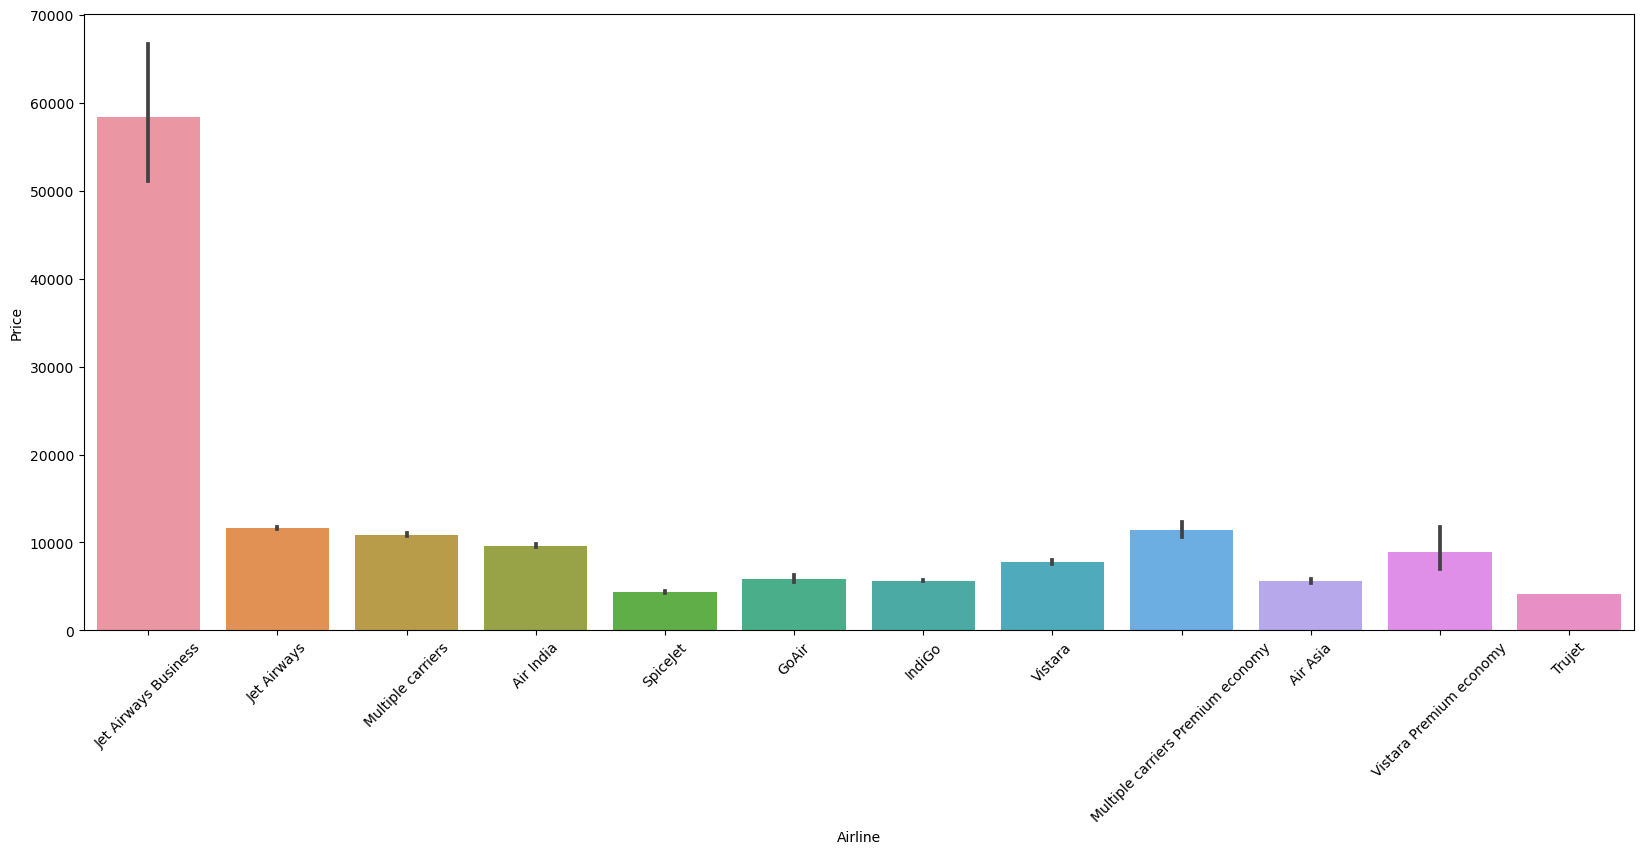

In [29]:
# price distribution for each airline
plt.figure(figsize=(20, 8))
sns.barplot(data=train_data.sort_values('Price',ascending=False), x = 'Airline', y='Price')
plt.xticks(rotation=45)
plt.show()

### Does price vary with airlines?
* Vistara has Maximum Price range
* Vistara and Air_India Airlines Have Maximum Price when compared to Others
* SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

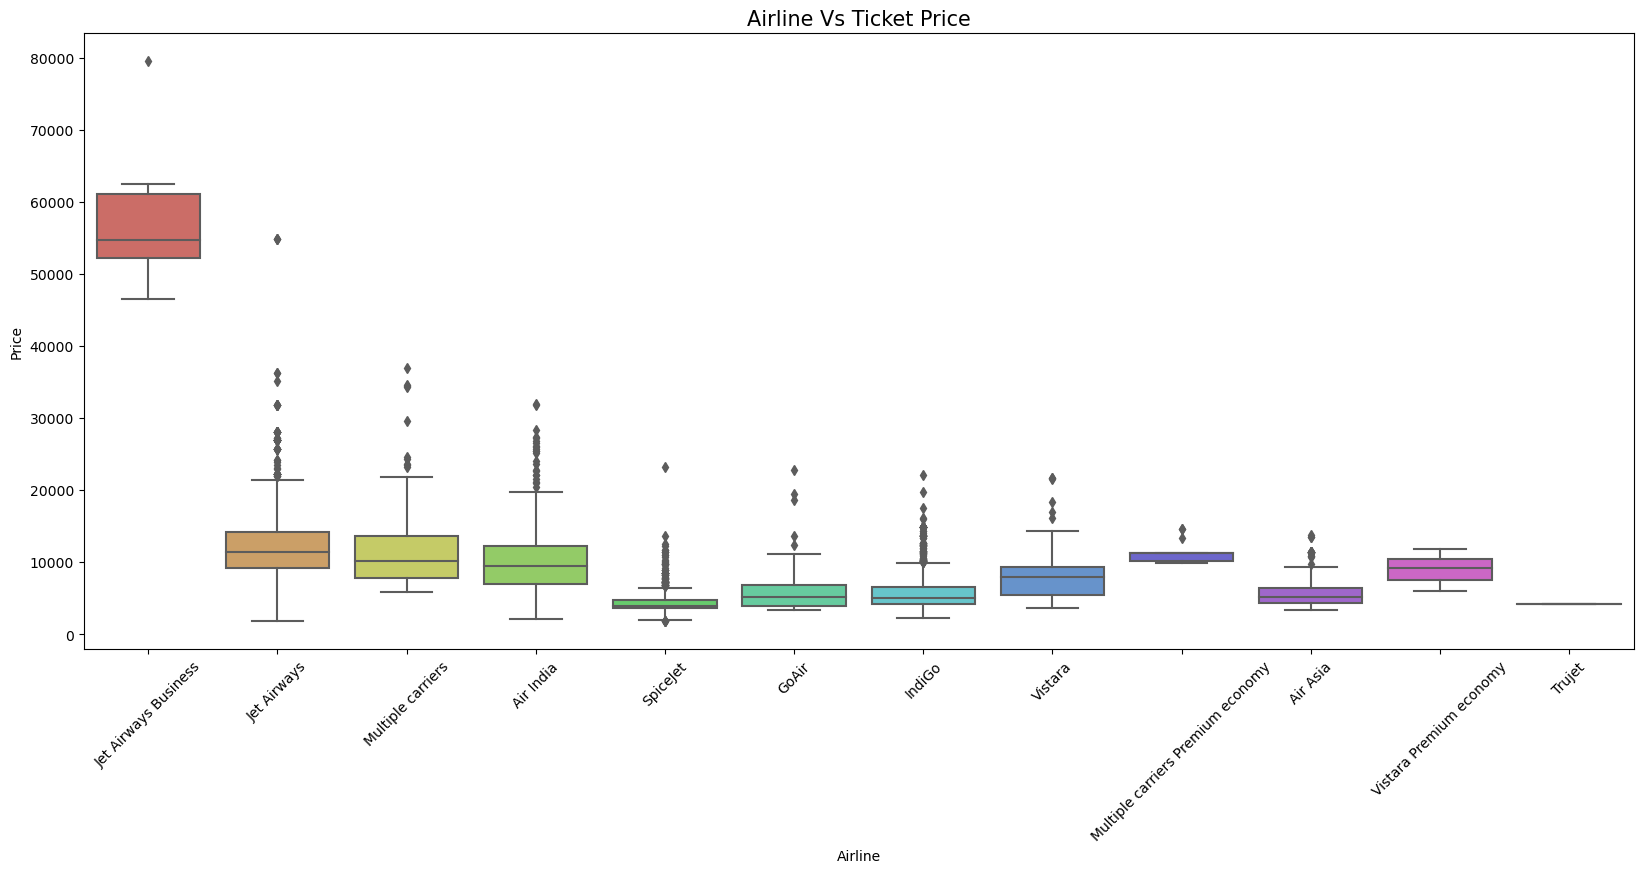

In [30]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False), palette='hls')
plt.title('Airline Vs Ticket Price',fontsize=15)
plt.xlabel('Airline',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.xticks(rotation=45)
plt.show()


In [31]:
# create dummy columns out of the Airline column
airline = train_data[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)
airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


### Does price vary with source?
* The plot below shows that if you are going from Bangalore, the prices are slightly higher as compared to other cities

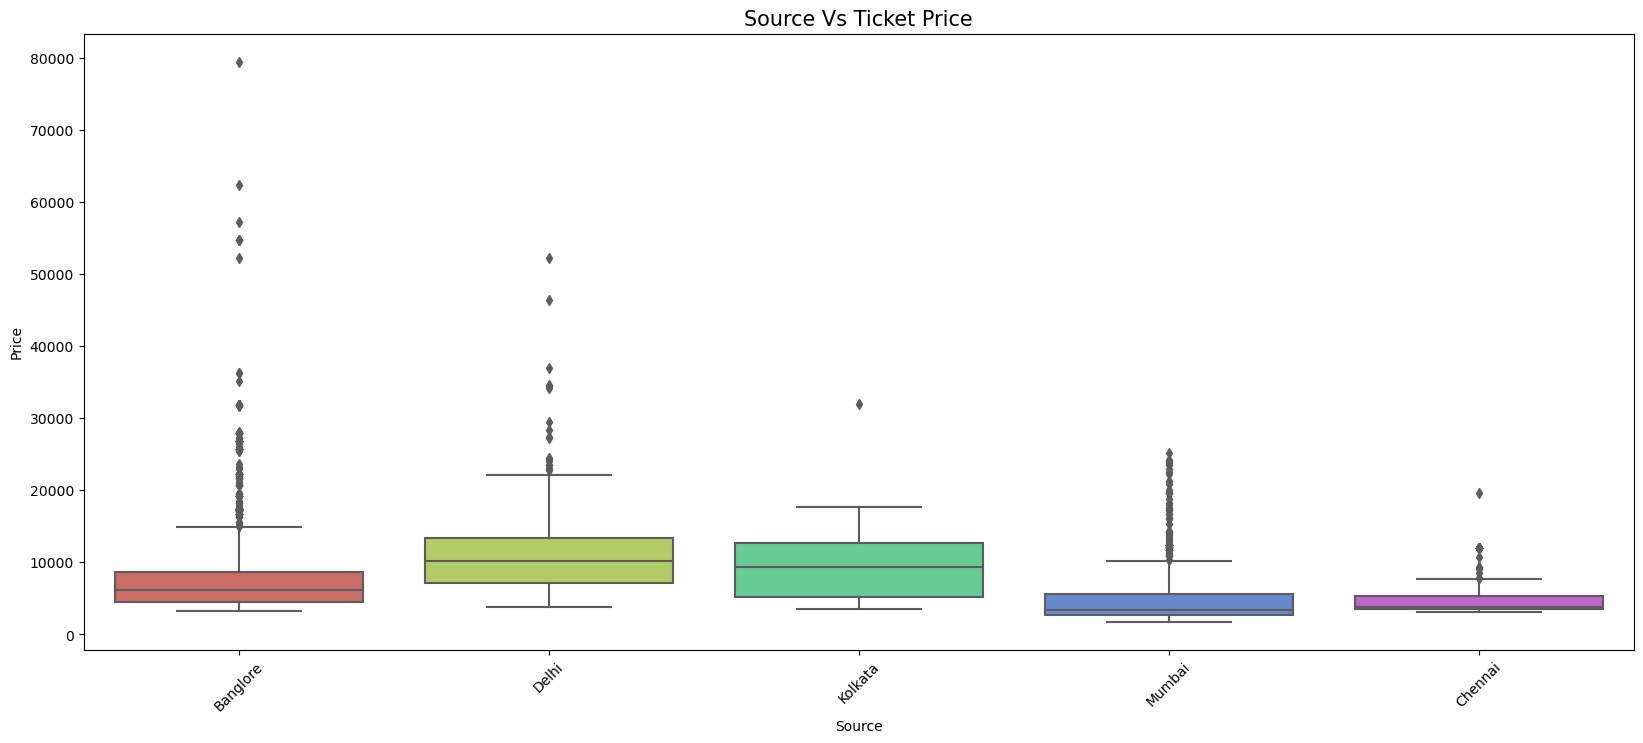

In [32]:
#plot to show the price vs source
plt.figure(figsize=(20,8))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False), palette='hls')
plt.title('Source Vs Ticket Price',fontsize=15)
plt.xlabel('Source',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.xticks(rotation=45)
plt.show()

If we are going from Banglore the prices are slightly higher as compared to other cities

In [33]:
# create dummy columns out of the Source column
source = train_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Does price vary with Destination?
* The plot belowe shows that if we are going to Delhi the prices are slightly higher as compared to other cities

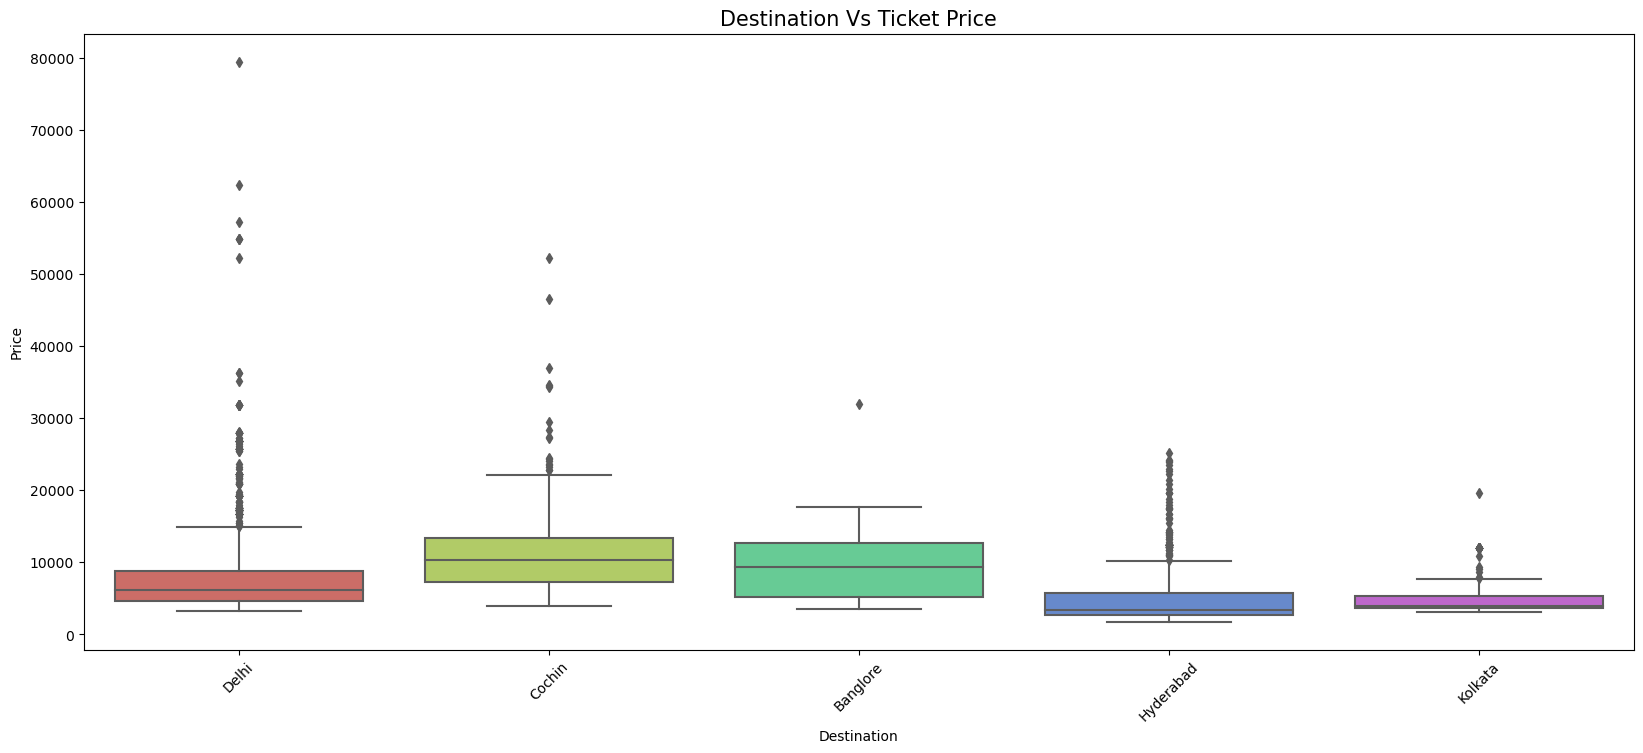

In [34]:
#plot to show the price vs source
plt.figure(figsize=(20,8))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False), palette='hls')
plt.title('Destination Vs Ticket Price',fontsize=15)
plt.xlabel('Destination',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [35]:
# create dummy columns out of the Destination column
destination = train_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


### Does price vary with number of stops?
* The plot belowe shows that flight with 1 or 2 stops has higher price than zero stop

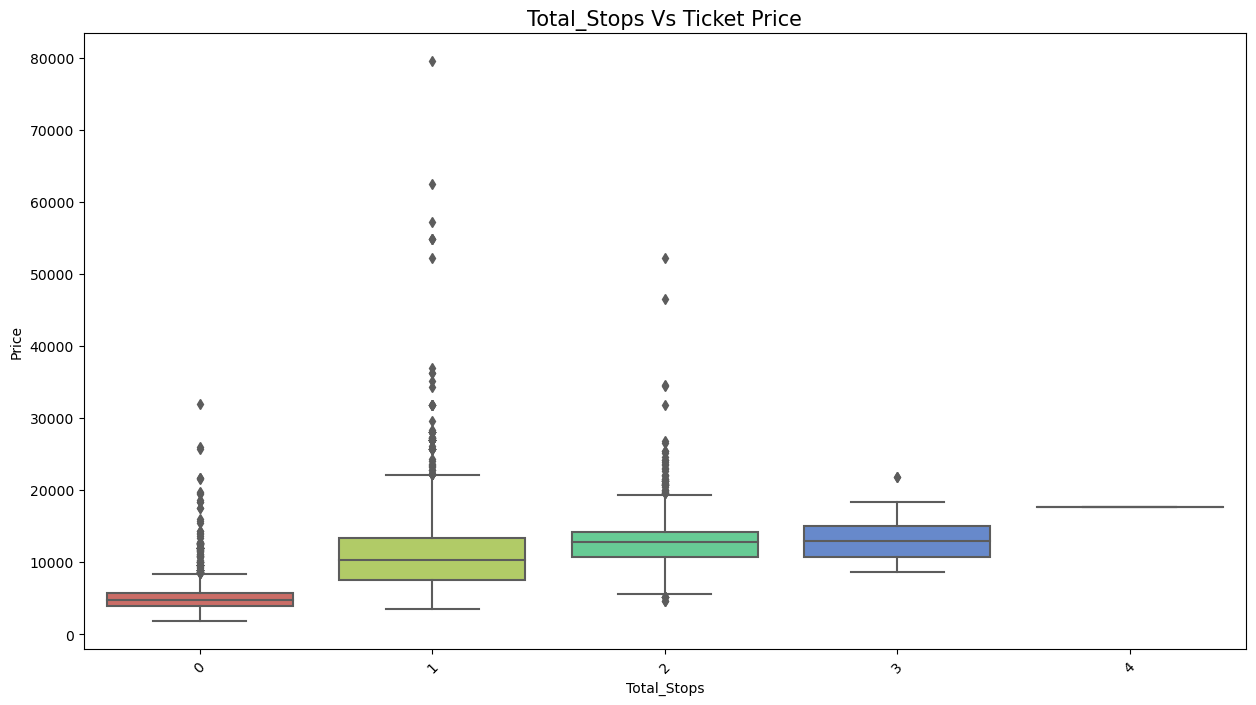

In [36]:
#plot to show the price vs source
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False), palette='hls')
plt.title('Total_Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Total_Stops',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [37]:
# Combine the dummy columns with the dataset
train_data = pd.concat([train_data, airline, source, destination],axis=1)

# drop columns 
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [38]:
# view dataset
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,1,0,0


# Step 3: Outlier Detection
Outliers can also affect the performance of clustering algorithms or change the distribution of data, leading to incorrect results. That's why it's important to identify and handle outliers appropriately, for example, by removing them or transforming the data, to ensure accurate results in data mining.
#### Here the list of data visualization plots to spot the outliers.
* Box and whisker plot (box plot).
* Scatter plot.
* Histogram.
* Distribution Plot.
* QQ plot

In [39]:
# create a plotting function
def plot(train_data,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(train_data[col],ax=ax1)
    sns.boxplot(train_data[col],ax=ax2)
    sns.distplot(train_data[col],ax=ax3,kde=False)

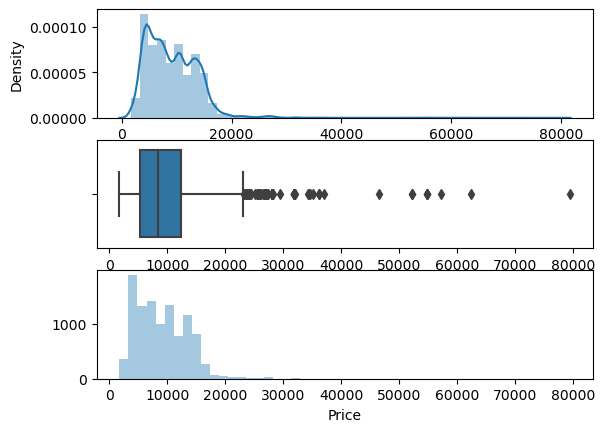

In [40]:
plot(train_data,'Price')

#### Detect outlier of price using IQR method
IQR method is used by box plot to highlight outliers. IQR stands for interquartile range, which is the difference between q3 (75th percentile) and q1 (25th percentile). The IQR method computes lower bound and upper bound to identify outliers. Any value below the lower bound and above the upper bound are considered to be outliers.
* Lower Bound = q1–1.5*IQR
* Upper Bound = q3+1.5*IQR

In [41]:
# Calculate Q1, Q2, Q3 and IQR.
Q1 = np.percentile(train_data['Price'], 25, interpolation = 'midpoint')
Q2 = np.percentile(train_data['Price'], 50, interpolation = 'midpoint')
Q3 = np.percentile(train_data['Price'], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)


Q1 25 percentile of the given data is,  5277.0
Q1 50 percentile of the given data is,  8372.0
Q1 75 percentile of the given data is,  12373.0
Interquartile range is 7096.0


In [42]:
# Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively.
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -5367.0
up_limit is 23017.0


In [43]:
# Data points greater than the upper limit or less than the lower limit are outliers
outlier =[]
for x in train_data['Price']:
    if ((x> up_lim) or (x<low_lim)):
        outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [44]:
# creta a function to check th ecolumn 'Price' has a negative numbe or not
numebr = 0
count = 0
for i in train_data['Price']:
    if i < numebr:
        count = count + 1
 
# printing the intersection
print("The numbers less than 0 : " + str(count))

The numbers less than 0 : 0


In [45]:
train_data = train_data[train_data['Price'] < up_lim]

In [46]:
train_data

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,2,...,0,0,0,0,1,0,0,0,0,0
10679,0,4145,27,4,2019,20,45,23,20,2,...,0,0,0,0,1,0,0,0,0,0
10680,0,7229,27,4,2019,8,20,11,20,3,...,0,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,2019,11,30,14,10,2,...,1,0,0,0,0,0,0,1,0,0


# Step 4: Feature Selection
Feature Selection is the process of selecting out the most significant features from a given dataset. In many of the cases, Feature Selection can enhance the performance of a machine learning model as well.

In [47]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  int64 
 4   Price           10682 non-null  int64 
 5   Journey_day     10682 non-null  int64 
 6   Journey_month   10682 non-null  int64 
 7   Journey_year    10682 non-null  int64 
 8   Dep_hour        10682 non-null  int64 
 9   Dep_min         10682 non-null  int64 
 10  Arrival_hour    10682 non-null  int64 
 11  Arrival_min     10682 non-null  int64 
 12  Duration_hours  10682 non-null  int64 
 13  Duration_mins   10682 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.5+ MB


In [48]:
# drop the journey_year column
copy.drop('Journey_year', inplace=True,axis=1)


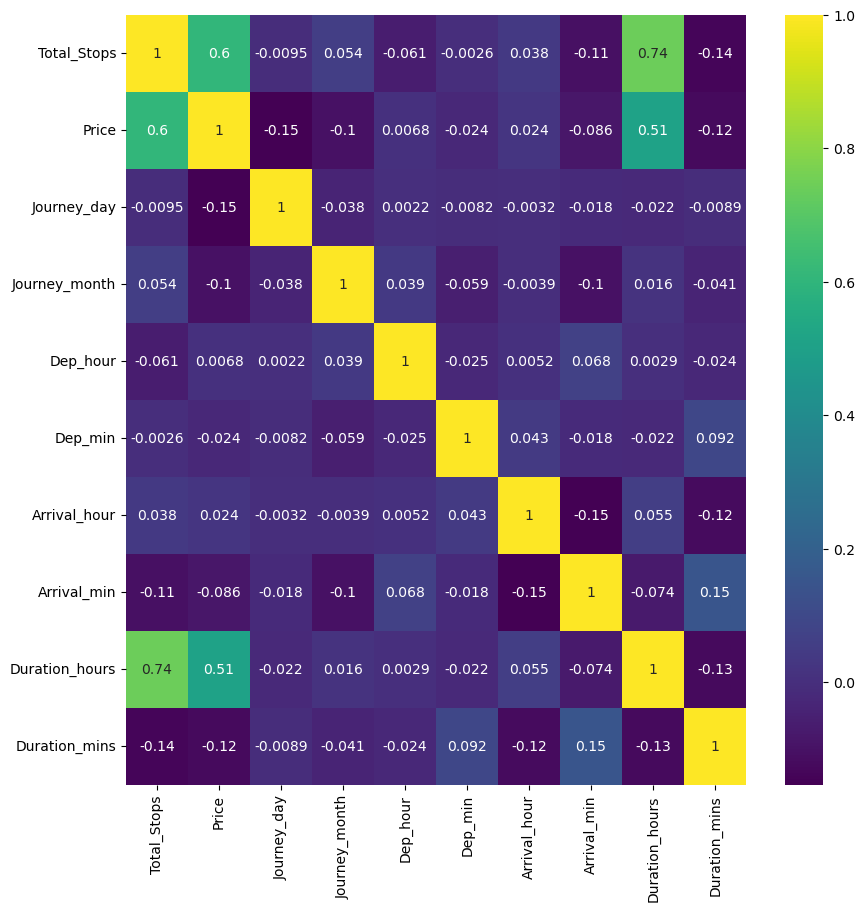

In [49]:
# checking correlations between columns.
plt.figure(figsize=(10,10))
sns.heatmap(copy.corr(),cmap='viridis',annot=True)
plt.show()

* Just checking the correlation between different features of training data.
* We can see that Total_stops is highly correlated with Duration_hours. If the no. of stops would increase, the duration hours of the flight will also increase. 
* Also, price is highly correlated with total stops. If stops would increase that would also require a high quantity of fuel to cuase increasing of the price.

### Checking feature importance 

In [50]:
# train data
X = train_data.drop('Price',axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# train data labels
Y = train_data['Price']
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [52]:
reg = ExtraTreesRegressor()
reg.fit(X,Y)

print(reg.feature_importances_)

[2.81345622e-01 8.72512910e-02 7.92486164e-02 0.00000000e+00
 2.32272531e-02 2.20862497e-02 2.21908809e-02 1.99768670e-02
 1.57090232e-01 1.72475288e-02 1.16492489e-02 2.76259942e-03
 2.11369317e-02 1.53638817e-01 0.00000000e+00 2.35594180e-02
 1.12577399e-03 7.61766299e-03 1.72224350e-04 5.45549525e-03
 7.56533711e-05 7.39729887e-04 1.44716257e-02 1.01146362e-02
 6.34824173e-03 1.38176101e-02 7.52995752e-03 9.14105653e-03
 9.78776651e-04]


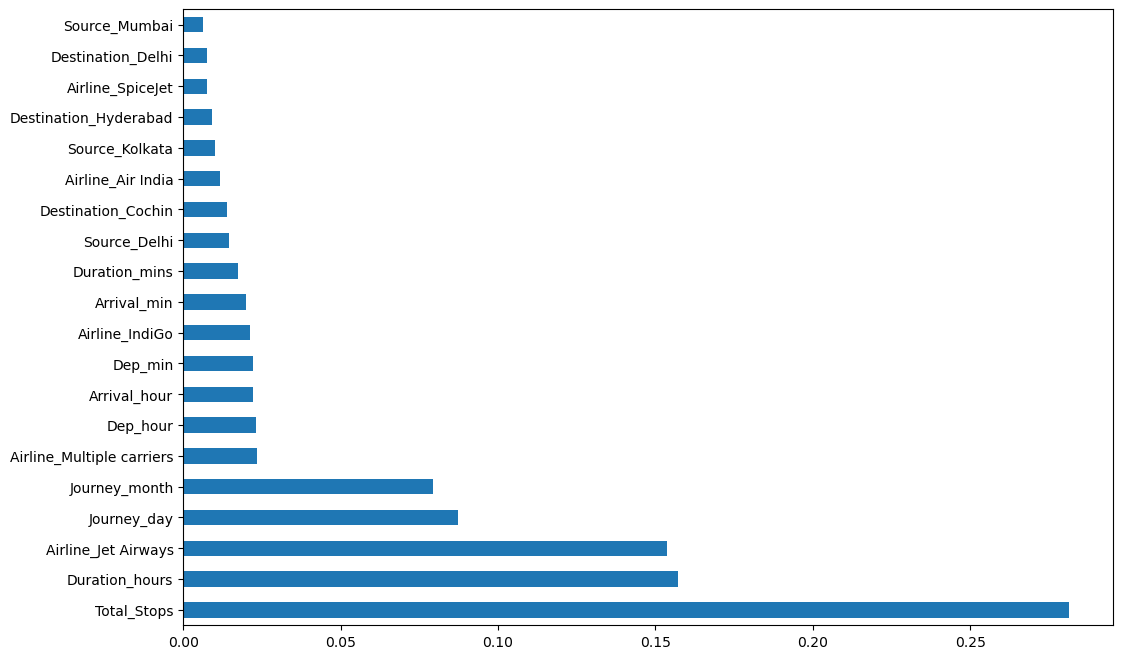

In [53]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

* Total_stops is the feature with the highest feature importance in deciding the Price as we have also seen above.
* After that Journey Day also plays a big role in deciding the Price. Prices are generally higher on weekends.

# Step 5: Building Machine Learning Models
### what we often do in modelling:
* Initially ,lets build basic random forest model.
* Then later-on , we will try to improve this model using some parameters..
* Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [54]:
# plits data into random subsets for training and testing 
from sklearn.model_selection import train_test_split

# import rondom forest regression package
from sklearn.ensemble import RandomForestRegressor

# import confusion matrix scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [55]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [56]:
# build model
ml_model=RandomForestRegressor()
model=ml_model.fit(X_train,y_train)

In [57]:
# predicted results
y_pred=model.predict(X_test)
y_pred

array([ 8301.15      , 13611.66883333,  8420.44      , ...,
        9680.26      ,  8661.74      , 14308.41      ])

In [58]:
# measure the accuracy of traning data
ml_model.score(X_train, y_train)

0.9496893590567583

In [59]:
# measure the accuracy of testing data
ml_model.score(X_test, y_test)

0.814836998256849

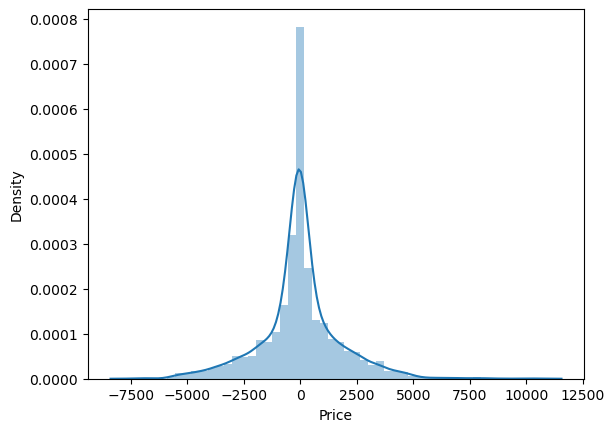

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

As we can see that most of the residuals are 0, which means our model is generalizing well.

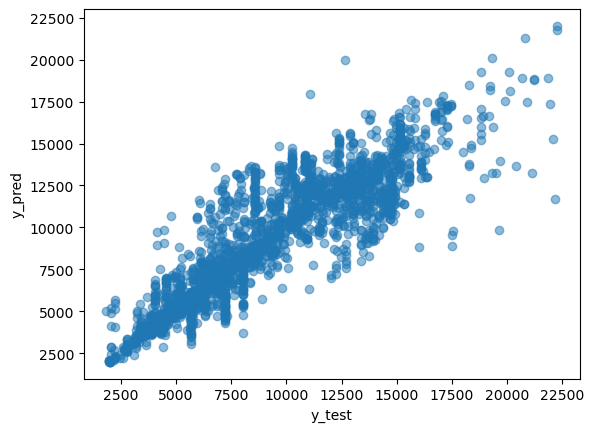

In [61]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

* Simply plotting our predictions vs the true values.
* Ideally, it should be a straight line.

In [62]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1141.6578746829714
MSE: 3090010.139240298
RMSE: 1757.8424671284677


In [63]:
# RMSE/(max(DV)-min(DV))
2090.5509/(max(Y)-min(Y))

0.09841591658035967

In [64]:
print('r2 score: ', metrics.r2_score(y_test,y_pred))

r2 score:  0.814836998256849


#### How to save ML model into disk

In [65]:
file = open('flight_rf.pkl', 'wb')
pickle.dump(model, file)

In [66]:
model=open('flight_rf.pkl','rb')

In [67]:
forecast_price = pickle.load(model)

In [68]:
forecast_price.predict(X_test)

array([ 8301.15      , 13611.66883333,  8420.44      , ...,
        9680.26      ,  8661.74      , 14308.41      ])

# Step 6: Evaluate Model

In [69]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [71]:
mape(y_test,forecast_price.predict(X_test))

13.010956985951363

In [72]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

Training_score: 0.9496882058022327
Predictions are : [ 8296.08       13765.18833333  8428.78       ...  9801.119
  8800.45       14346.23      ]


r2_score: 0.8141769037089225
MSE :  3101025.8325848007
MAE :  1139.9417081573874
RMSE :  1760.9729789479454
MAPE :  12.994534711749012


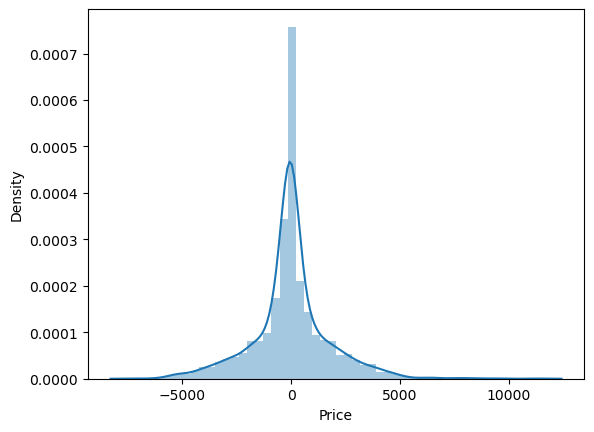

In [74]:
predict(RandomForestRegressor())

### Hypertune ml model to improve the performance of model
Hyperparameter Tuning or Hyperparameter Optimization
1.Choose following method for hyperparameter tuning
    a.RandomizedSearchCV --> Fast way to Hypertune model
    b.GridSearchCV--> Slow way to hypertune my model
2.Choose ML algo that u have to hypertune
2.Assign hyperparameters in form of dictionary or create hyper-parameter space
3.define searching &  apply searching on Training data or  Fit the CV model 
4.Check best parameters and best score

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [77]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [78]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [79]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [80]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [81]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [82]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/ivanmeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/ivanmeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/ivanmeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as i

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [83]:
### to get your best model..
rf_Random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [84]:
pred2=rf_Random.predict(X_test)

In [85]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8367430062643099

[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=1000; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1000; total time=   1.5s
[CV] END max_depth=21, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   9.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=1000; total time=   1.5s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=1000; total time=   2.8s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=1080; total time=   3.6s
[CV] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=1120; total time=   5.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=   3.7s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=15, n_estimators=1000; total time=   2.7s
[CV] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=1120; total

# Conclusion
Hence we have successfully built the Flight Price Prediction Machine Learning Model to predict the price of flights which will help us to select the best possible travel route and to reach our destination according to our own demand and utility.